## Supreme ML Beatzzzzzzzz


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mlbeats
#Load NeuroKit and other useful packages
import neurokit2 as nk

import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

## Info about the database
#### Name: Mit Bih Arrythmia database
Link to the database website: https://archive.physionet.org/physiobank/database/html/mitdbdir/intro.htm

In early copies of the database, most beat labels were placed at the R-wave peak

In [2]:
#define some inportant things about the dataset


In [3]:
#import dataset and annotations into a pandas dataframe
df = pd.read_csv("mitbih_database/101.csv")
annotations = mlbeats.df_from_txt("mitbih_database/101annotations.txt")

#preview of how the dataframe looks
annotations.head()

,Time,Sample#,Result
0,0:00.019,7,+
1,0:00.231,83,N
2,0:01.100,396,N
3,0:01.975,711,N
4,0:02.867,1032,N


(0.0, 2000.0)

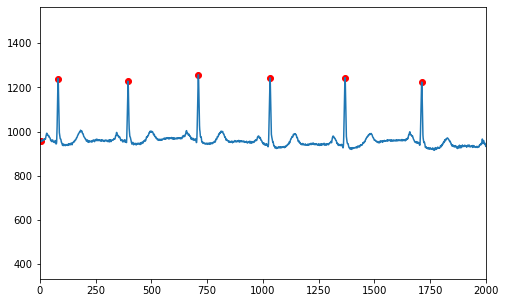

In [4]:
#preview of how the plot looks
plt.plot(df["\'sample #\'"], df["\'MLII\'"])
for i in range(7):
    x = int(annotations['Sample#'][i])
  #  xx = i*100;
    
    plt.scatter(x, df["\'MLII\'"][x], color = 'red')
    
  #  plt.scatter(xx, df["\'MLII\'"][xx], color = 'green')

plt.xlim(00,2000)

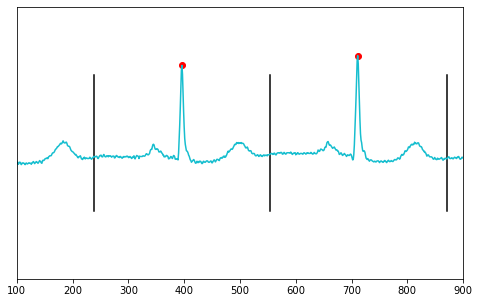

In [5]:
#Lets try to partition the heartbeats into individual segments
def bar(x):
    #from 800-1200
    plt.plot([x,x], [800,1200],'black', '-')
#take the peaks, and plot halfway between
for i in range(9):
    x = (int(annotations['Sample#'][i]) + int(annotations['Sample#'][i+1]))//2
    bar(x)
    
plt.plot(df["\'sample #\'"], df["\'MLII\'"])
for i in range(7):
    x = int(annotations['Sample#'][i])
    plt.scatter(x, df["\'MLII\'"][x], color = 'red')

plt.xlim(100,900)
plt.ylim(600, 1400)
plt.show()

In [6]:
#lets make a df with some of this data
training = pd.DataFrame(columns = ['Result', 'Sample#', 'heightpeak', 'distance','RPEAK','PPEAK', 'More Features'] )
training['Sample#'] = annotations['Sample#']
training['Result'] = annotations['Result']

        

In [7]:
for n in range(500):
    for i in range(2):
        if (df["\'MLII\'"][int(training['Sample#'][n])])>(df["\'MLII\'"][int(training['Sample#'][n])+i])&(df["\'MLII\'"][int(training['Sample#'][n])])>(df["\'MLII\'"][int(training['Sample#'][n])-i]):
            training['RPEAK'][n]=(df["\'MLII\'"][int(training['Sample#'][n])]);
        else:
            training['RPEAK'][n]="NA";

In [13]:
ecg_signal = nk.data(dataset="ecg_3000hz")['ECG']
# Extract R-peaks locations
__, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=3000)

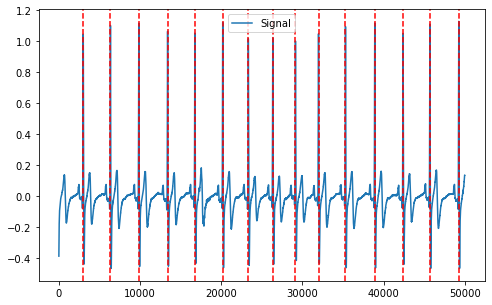

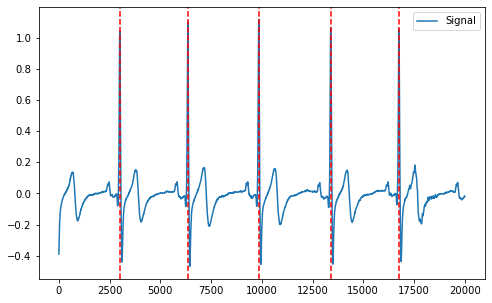

In [14]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:20000])

In [12]:
#before we do all the ML craziness, we need to create a csv to hold the training data
#it will be easiest to create a dataframe and just use pandas .to_csv method
for i in range(5):
    training['heightpeak'][i] = df["\'MLII\'"][int(training['Sample#'][i])]
    #so this is just distance between samples
    distance=int(training['Sample#'][i+1])-int(training['Sample#'][i])
    if((100<distance<400)):
        training['distance'][i]=distance
#    else:
#        training['distance'][i]="NA"

#   training['extra']
training.head()



,Result,Sample#,heightpeak,distance,RPEAK,PPEAK,More Features
0,+,7,955,NaN,NA,NaN,NaN
1,N,83,1237,313,NA,NaN,NaN
2,N,396,1228,315,NA,NaN,NaN
3,N,711,1257,321,NA,NaN,NaN
4,N,1032,1243,336,1243,NaN,NaN
